In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# HW3

## Q1

In [2]:
np.random.seed(365)

n = 100
mu, sigma = 1, 2
x = stats.norm(loc=mu, scale=sigma).rvs(size=n)
C, G = 2, 10000
theta, tau = np.zeros([C, G]), np.zeros([C, G])

for c in range(C):
    for g in range(1, G):
        tau[c, g] = stats.gamma(a=n/2+1,scale=2/np.sum((x-theta[c, g-1])**2)).rvs()
        theta[c, g] = stats.norm(loc=np.mean(x), scale=1/(n*tau[c, g])**0.5).rvs()

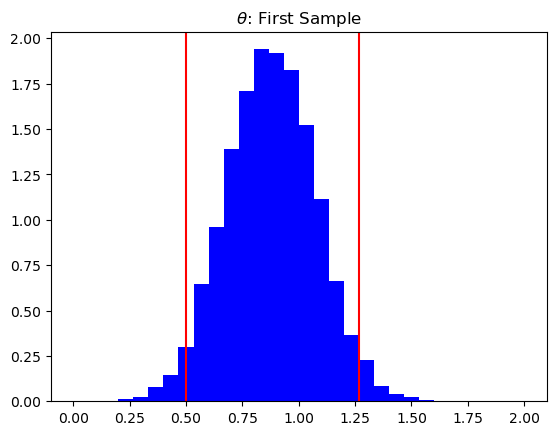

95% Credible Interval:  [0.49971395 1.26812101]


In [3]:
plt.hist(theta[0, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[0, :], 0.025), color="red")
plt.axvline(np.quantile(theta[0, :], 0.975), color="red")
plt.title(r"$\theta$: First Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[0, :], [0.025, 0.975]))

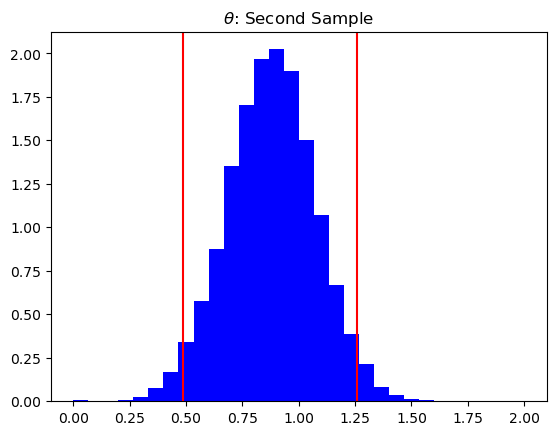

95% Credible Interval:  [0.48711488 1.25949807]


In [4]:
plt.hist(theta[1, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[1, :], 0.025), color="red")
plt.axvline(np.quantile(theta[1, :], 0.975), color="red")
plt.title(r"$\theta$: Second Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[1, :], [0.025, 0.975]))

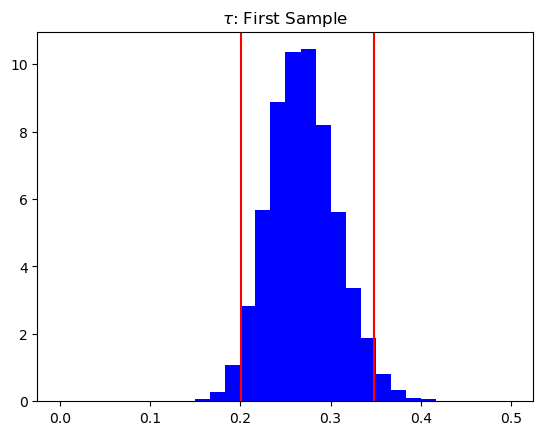

95% Credible Interval:  [0.20089002 0.34783001]


In [5]:
plt.hist(tau[0, :], bins=30, range=(0, 0.5), density=True, color="blue")
plt.axvline(np.quantile(tau[0, :], 0.025), color="red")
plt.axvline(np.quantile(tau[0, :], 0.975), color="red")
plt.title(r"$\tau$: First Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(tau[0, :], [0.025, 0.975]))

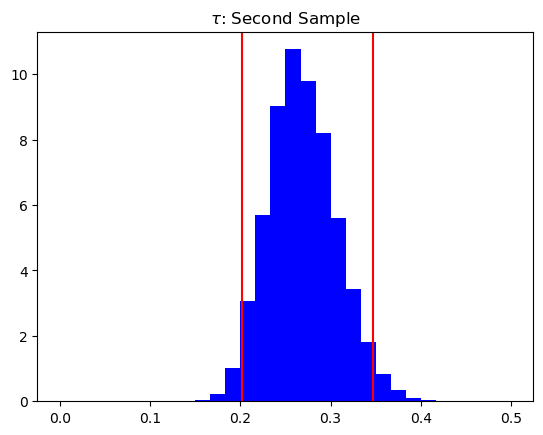

95% Credible Interval:  [0.20160971 0.34723158]


In [6]:
plt.hist(tau[1, :], bins=30, range=(0, 0.5), density=True, color="blue")
plt.axvline(np.quantile(tau[1, :], 0.025), color="red")
plt.axvline(np.quantile(tau[1, :], 0.975), color="red")
plt.title(r"$\tau$: Second Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(tau[1, :], [0.025, 0.975]))

## Q2

$\Large
\begin{align*}
p(\theta|\tau,\boldsymbol{x})&\propto p(\boldsymbol{x}|\theta,\tau)p(\theta)\\
&\propto\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}}e^{-\frac{\tau}{2}(x_i-\theta)^2}\sqrt{\frac{\tau_0}{2\pi}}e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto e^{-\frac{\tau}{2}\sum_{i=1}^n(x_i-\theta)^2}e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto e^{-\frac{\tau}{2}\sum_{i=1}^n\theta^2-2\theta x_i}e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto e^{-\frac{\tau}{2}n\theta^2-2\theta\sum_{i=1}^nx_i}e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto e^{-\frac{\tau n}{2}(\theta^2 -2\theta\bar x)}e^{-\frac{\tau_0}{2}(\theta-\theta_0)^2}\\
&\propto e^{-\frac{1}{2}((\tau n\theta^2-2\tau n\bar x\theta)+(\tau_0\theta^2-2\tau_0\theta\theta_0))}\\
&=e^{-\frac{1}{2}(\theta^2(\tau n+\tau_0)-2\theta(n\tau\bar x+\tau_0\theta_0))}\\
&=e^{-\frac{1}{2}\frac{\tau n+\tau_0}{\tau n+\tau_0}(\theta^2(\tau n+\tau_0)-2\theta(n\tau\bar x+\tau_0\theta_0))} \\
&=e^{-\frac{\tau n+\tau_0}{2}(\theta^2-2\theta(\frac{n\tau\bar x+\tau_0\theta_0}{\tau n+\tau_0}))}\\
&=e^{-\frac{\tau n+\tau_0}{2}(\theta-(\frac{n\tau\bar x+\tau_0\theta_0}{\tau n+\tau_0}))^2}\\
&\propto\sqrt{\frac{\tau n+\tau_0}{2\pi}}e^{-\frac{\tau n+\tau_0}{2}(\theta-(\frac{n\tau\bar x+\tau_0\theta_0}{\tau n+\tau_0}))^2}\\
&\sim N(\frac{n\tau\bar x+\tau_0\theta_0}{\tau n+\tau_0},\tau n+\tau_0)
\end{align*}$

$\Large
\begin{align*}
p(\tau|\theta,\boldsymbol{x})&\propto p(\boldsymbol{x}|\tau,\theta)p(\tau)\\
&\propto\prod_{i=1}^n\sqrt{\frac{\tau}{2\pi}}e^{-\frac{\tau}{2}(x_i-\theta)^2}\frac{(\frac{\lambda}{2})^{\frac{\alpha}{2}}}{\Gamma(\frac{\alpha}{2})}\tau^{\frac{\alpha}{2}-1}e^{-\frac{\lambda}{2}\tau}\\
&\propto\tau^\frac{n}{2}e^{-\frac{\tau}{2}\sum_{i=1}^n(x_i-\theta)^2}\tau^{\frac{\alpha}{2}-1}e^{-\frac{\lambda}{2}\tau}\\
&=\tau^{\frac{\alpha+n}{2}-1}e^{-\frac{\lambda+(\sum_{i=1}^n(x_i-\theta)^2)}{2}\tau}\\
&\propto\frac{(\frac{\lambda+(\sum_{i=1}^n(x_i-\theta)^2)}{2})^{\frac{\alpha+n}{2}}}{\Gamma(\frac{\alpha+n}{2})}\tau^{\frac{\alpha+n}{2}-1}e^{-\frac{\lambda+(\sum_{i=1}^n(x_i-\theta)^2)}{2}\tau}\\
&\sim Gam(\frac{\alpha+n}{2},\frac{\lambda+(\sum_{i=1}^n(x_i-\theta)^2)}{2})
\end{align*}$

In [7]:
np.random.seed(365)

n = 100
mu, sigma = 1, 2
x = stats.norm(loc=mu, scale=sigma).rvs(size=n)
theta_0, tau_0 = [0, 10], [0.1, 10]
alpha, lambda_ = [1, 10], [1, 10]
C, G = 5, 10000
theta, tau = np.zeros([C, G]), np.zeros([C, G])

for c in range(C):
    for g in range(1, G):
        tau[c, g] = stats.gamma(a=(alpha[c==3]+n)/2,
                                scale=2/(lambda_[c==4]+np.sum((x-theta[c, g-1])**2))).rvs()
        theta[c, g] = stats.norm(loc=(n*tau[c, g]*np.mean(x)+tau_0[c==2]*theta_0[c==1])/(tau[c, g]*n+tau_0[c==2]),
                                 scale=1/(tau[c, g]*n+tau_0[c==2])**0.5).rvs()

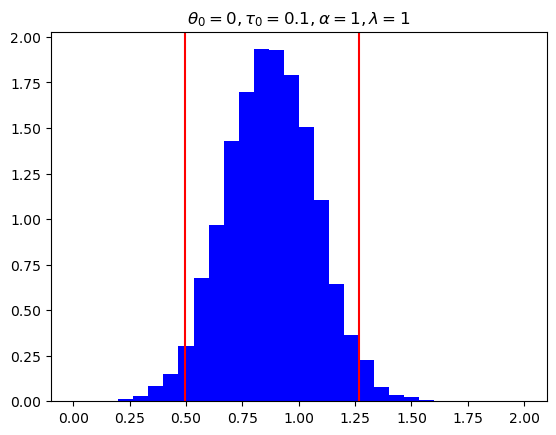

95% Credible Interval:  [0.49419129 1.26634107]


In [8]:
plt.hist(theta[0, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[0, :], 0.025), color="red")
plt.axvline(np.quantile(theta[0, :], 0.975), color="red")
plt.title(r"$\theta_0=0, \tau_0=0.1, \alpha=1, \lambda=1$")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[0, :], [0.025, 0.975]))

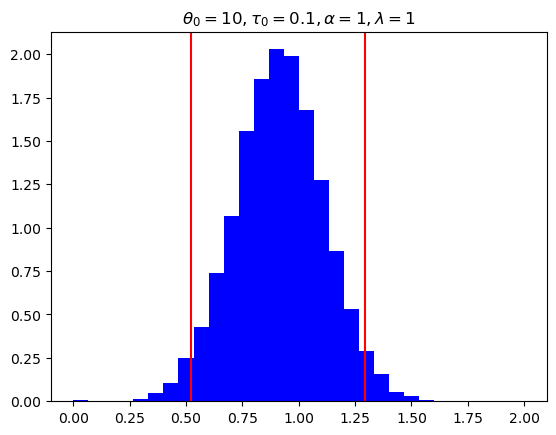

95% Credible Interval:  [0.52105603 1.29587713]


In [9]:
plt.hist(theta[1, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[1, :], 0.025), color="red")
plt.axvline(np.quantile(theta[1, :], 0.975), color="red")
plt.title(r"$\theta_0=10, \tau_0=0.1, \alpha=1, \lambda=1$")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[1, :], [0.025, 0.975]))

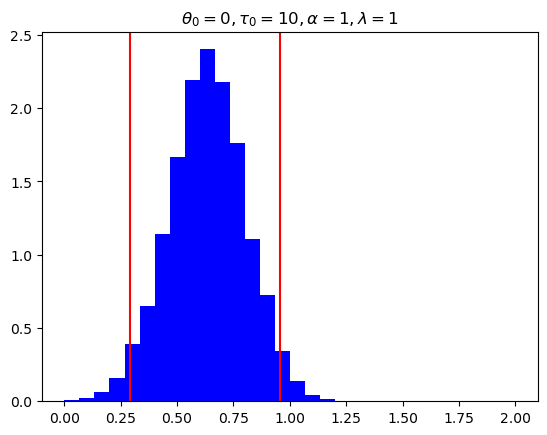

95% Credible Interval:  [0.2930498  0.95780466]


In [10]:
plt.hist(theta[2, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[2, :], 0.025), color="red")
plt.axvline(np.quantile(theta[2, :], 0.975), color="red")
plt.title(r"$\theta_0=0, \tau_0=10, \alpha=1, \lambda=1$")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[2, :], [0.025, 0.975]))

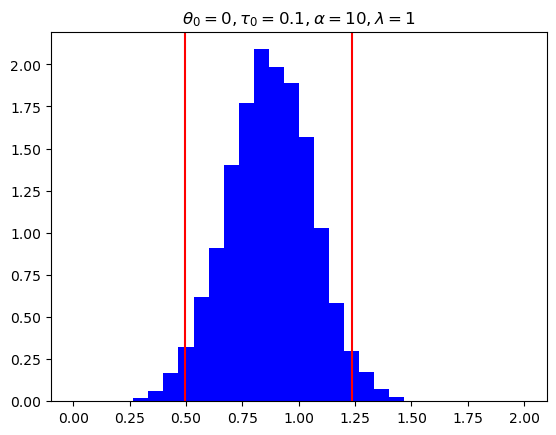

95% Credible Interval:  [0.4964273  1.23620777]


In [11]:
plt.hist(theta[3, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[3, :], 0.025), color="red")
plt.axvline(np.quantile(theta[3, :], 0.975), color="red")
plt.title(r"$\theta_0=0, \tau_0=0.1, \alpha=10, \lambda=1$")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[3, :], [0.025, 0.975]))

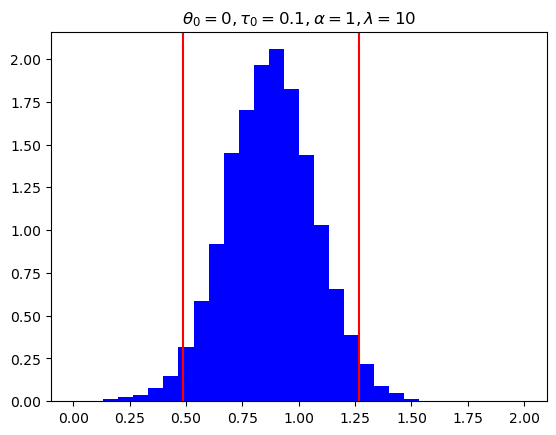

95% Credible Interval:  [0.48774799 1.26644281]


In [12]:
plt.hist(theta[4, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[4, :], 0.025), color="red")
plt.axvline(np.quantile(theta[4, :], 0.975), color="red")
plt.title(r"$\theta_0=0, \tau_0=0.1, \alpha=1, \lambda=10$")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[4, :], [0.025, 0.975]))

The normal prior means $\frac{\tau_0}{\tau}$ data points with normal distribution with a mean of $\theta_0$, and the gamma prior means $\alpha$ data points with gamma distribution with a squared deviation of $\lambda$.

## Q3

### Part A

$\begin{align*}
\int p(\boldsymbol{x}|\theta)p(\theta)d\theta&=\int_0^\infty\frac{n!}{\prod_{i=1}^{k} x_i!}\prod_{i=1}^k\theta_i^{x_i}\frac{1}{B(\boldsymbol{\alpha})}\prod_{i=1}^k\theta_i^{\alpha_i-1}d\theta\\
&=\frac{n!}{\prod_{i=1}^{k} x_i!}\prod_{i=1}^k\frac{1}{B(\boldsymbol{\alpha})}\int_0^\infty\prod_{i=1}^k\theta_i^{x_i}\prod_{i=1}^k\theta_i^{\alpha_i-1}d\theta\\
&=\frac{n!}{\prod_{i=1}^{k}x_i!}\frac{1}{B(\boldsymbol{\alpha})}B(\boldsymbol{x}+\boldsymbol{\alpha})\int_0^\infty\frac{1}{B(\boldsymbol{x}+\boldsymbol{\alpha})}\prod_{i=1}^k\theta_i^{x_i+\alpha_i-1}d\theta\\
&=\frac{n!}{\prod_{i=1}^{k}x_i!}\frac{1}{B(\boldsymbol{\alpha})}B(\boldsymbol{x}+\boldsymbol{\alpha})
\end{align*}$

$\begin{align*}
p(\theta|\boldsymbol{x})&=\frac{p(\boldsymbol{x}|\theta)p(\theta)}{\int p(\boldsymbol{x}|\theta)p(\theta)d\theta} \\
&=\frac{p(\boldsymbol{x}|\theta)p(\theta)}{\frac{n!}{\prod_{i=1}^{k}x_i!}\frac{1}{B(\boldsymbol{\alpha})}B(\boldsymbol{x}+\boldsymbol{\alpha})}\\
&=\frac{\frac{n!}{\prod_{i=1}^{k} x_i!}\prod_{i=1}^k\theta_i^{x_i}\frac{1}{B(\boldsymbol{\alpha})}\prod_{i=1}^k\theta_i^{\alpha_i-1}}{\frac{n!}{\prod_{i=1}^{k}x_i!}\frac{1}{B(\boldsymbol{\alpha})}B(\boldsymbol{x}+\boldsymbol{\alpha})}\\
&=\frac{1}{B(\boldsymbol{x}+\boldsymbol{\alpha})}\prod_{i=1}^k\theta_i^{x_i+\alpha_i-1}\sim Dir(\boldsymbol{x}+\boldsymbol{\alpha})
\end{align*}$

### Part B

If the prior is proper, then derive the joint distribution and rearrange the terms. Ater that, drop the constants and leave the kernel to recognize its family. Finally, use normalizing constants to match the kernel and get the posterior distribution. However, this is unnecessary since Bayesians can use samples from the posterior instead of the exact posterior distribution.